# Train a Neural Network

Here we will use Pytorch to build and train a simple neural network step-by-step. Below you will find a sample code, which you will have to finish and execute. But first things first.

Let's start with some basic imports:

As mentioned during the lesson, we will use a dataset with pet images. We have already build a data loader called `Cifar10Dataloader` so we can simply import `CIFAR10`.

Besides the dataset, we also import `torch`, `numpy` and `torchvision` which is a library to help us with data preperation and transformations.

In [1]:
#Numpy is linear algebra lbrary
import numpy as np
# Matplotlib is a visualizations library 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import utils
from torchvision import transforms

/home/kaushik/miniconda3/envs/py3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Changed the given code skeleton so that user can choose between running locally or on the Educative platform.

In [2]:
flag_local_run = True

In [3]:
if flag_local_run:
    from torchvision.datasets import CIFAR10
else:
    import os
    import sys
    cwd = os.getcwd()
    #add CIFAR10 data in the environment
    sys.path.append(cwd + '/../cifar10')

    #CIFAR10 is a custom Dataloader that loads a subset of the data from a local folder
    from Cifar10Dataloader import CIFAR10

In [4]:
if flag_local_run:
    dataset_path = '~/data/cifar10'
else:
    dataset_path = '../cifar10'

## Load the dataset

After loading the images, we have to apply some transformations so we can feed them in the network.  
Here we simply convert them to tensors and normalize them. This can be done using `transforms` from `torchvision`.

All images fall into 1 of 10 categories of things.

Let's also plot some of them to make sure that everything works fine.

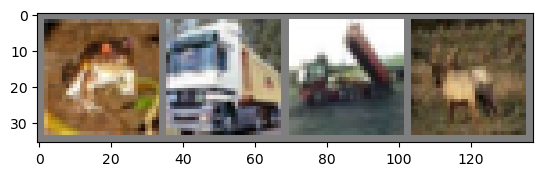

 frog truck truck  deer


In [5]:
batch_size=4

def load_data():
    
    #convert the images to tensor and normalized them
    transform = transforms.Compose([
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

    trainset = CIFAR10(root=dataset_path,  transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=False, num_workers=1)
    return trainloader


def show_image(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

classes = ('plane', 'car', 'bird', 'cat',
       'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# get some random training images
dataiter = iter(load_data())
# images, labels = dataiter.next()
images, labels = next(dataiter)

# show images
show_image(utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


## Build and train the model

And now for the good stuff. Let's define and train the model. This is where you will have to take action.

First you need to define a network that recieves and an input of size 3072, has 3 linear layers with dimensions 128,64,10, and 2 Relu layers in between.

Then you'll need to finish the training loop by declaring the  `torch.nn.CrossEntropyLoss` as our loss and `torch.optim.SGD` as our optimizer. Finally, you'll build the training loop and execute 1 or more training epochs. 

You can find a sample solution in the final cell of this notebook. I will strongly advice you though to spend as much time you need to write the code yourself. It is vital for the remaining of the course to have a solid understanding of how to build models and training loops.

* Note that the Jupyter notebook will remain active for 15 mins so you won't be able to run th entire training and see the model converge. But as soon as the running loss is decresing, you should be ok. 

In [6]:
## 1. DEFINE MODEL HERE
model = torch.nn.Sequential(
            torch.nn.Linear(3072, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64,10)
)

def train():

    training_data = load_data()
    
    # 2. LOSS AND OPTIMIZER
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = optim.SGD(params=model.parameters(), lr=0.001, momentum=0.9)
    
    running_loss = 0.0

    for epoch in range(10):
        for i, data in enumerate(training_data, 0):
            
            inputs, labels = data
            #reshape images so they can be fed to a nn.Linear()
            inputs = inputs.view(inputs.size(0), -1)

            optimizer.zero_grad()
            
            ##3. RUN BACKPROP
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            # Updates parameters
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 500 == 499:    # print every 500 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
                
    print('Training finished')
    

train()

[1,   500] loss: 2.158
[1,  1000] loss: 1.942
[1,  1500] loss: 1.848
[1,  2000] loss: 1.789
[1,  2500] loss: 1.756
[1,  3000] loss: 1.747
[1,  3500] loss: 1.719
[1,  4000] loss: 1.724
[1,  4500] loss: 1.685
[1,  5000] loss: 1.671
[1,  5500] loss: 1.636
[1,  6000] loss: 1.597
[1,  6500] loss: 1.589
[1,  7000] loss: 1.609
[1,  7500] loss: 1.600
[1,  8000] loss: 1.616
[1,  8500] loss: 1.633
[1,  9000] loss: 1.575
[1,  9500] loss: 1.574
[1, 10000] loss: 1.584
[1, 10500] loss: 1.602
[1, 11000] loss: 1.583
[1, 11500] loss: 1.558
[1, 12000] loss: 1.554
[1, 12500] loss: 1.541
[2,   500] loss: 1.495
[2,  1000] loss: 1.546
[2,  1500] loss: 1.532
[2,  2000] loss: 1.480
[2,  2500] loss: 1.465
[2,  3000] loss: 1.500
[2,  3500] loss: 1.498
[2,  4000] loss: 1.515
[2,  4500] loss: 1.469
[2,  5000] loss: 1.474
[2,  5500] loss: 1.460
[2,  6000] loss: 1.414
[2,  6500] loss: 1.428
[2,  7000] loss: 1.431
[2,  7500] loss: 1.442
[2,  8000] loss: 1.460
[2,  8500] loss: 1.481
[2,  9000] loss: 1.443
[2,  9500] 

## Evaluate

After running a few training epochs, you can evaluate the trained model and compute its accuracy on unseen data. To get the prediction, we feed an image to the network and the category that has the bigger output.

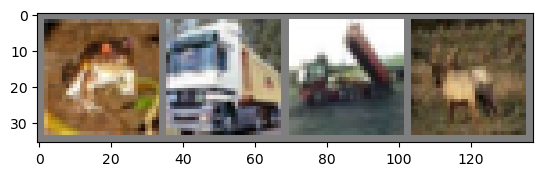

GroundTruth:   frog truck truck  deer
Predicted:   frog truck truck  frog


In [8]:
def evaluate():
    dataiter = iter(load_data())
    # images, labels = dataiter.next()
    images, labels = next(dataiter)

    # print images
    show_image(utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
    
    images = images.view(images.size(0), -1)
    outputs = model(images)
    
    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

evaluate()

## Sample solution

In [ ]:
## 1. DEFINE MODEL 
model = nn.Sequential(nn.Linear(3072, 128),
                          nn.ReLU(),
                          nn.Linear(128, 64),
                          nn.ReLU(),
                          nn.Linear(64, 10)
                          )

##2. LOSS AND OPTIMIZER
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

##3. RUN BACKPROP
outputs = model(inputs)
loss = criterion(outputs, labels)
loss.backward()
optimizer.step()